<H2><center><b>Customer Behaviour Analyst<b\><center\><H2>

Objective: Analyse customer purchase 
<br>
Date: Nov 2022

In [35]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV

# pd.set_option('display.max_rows', None)

In [36]:
df = pd.read_csv(r'C:\Users\Drive\Desktop\Data\Customer_Behaviour.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [37]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [39]:
df['Gender2']= df['Gender'].replace({'Female': 0, 'Male': 1})
df = df.drop(['User ID'], axis = 1)
df.head()

,Gender,Age,EstimatedSalary,Purchased,Gender2
0,Male,19,19000,0,1
1,Male,35,20000,0,1
2,Female,26,43000,0,0
3,Female,27,57000,0,0
4,Male,19,76000,0,1


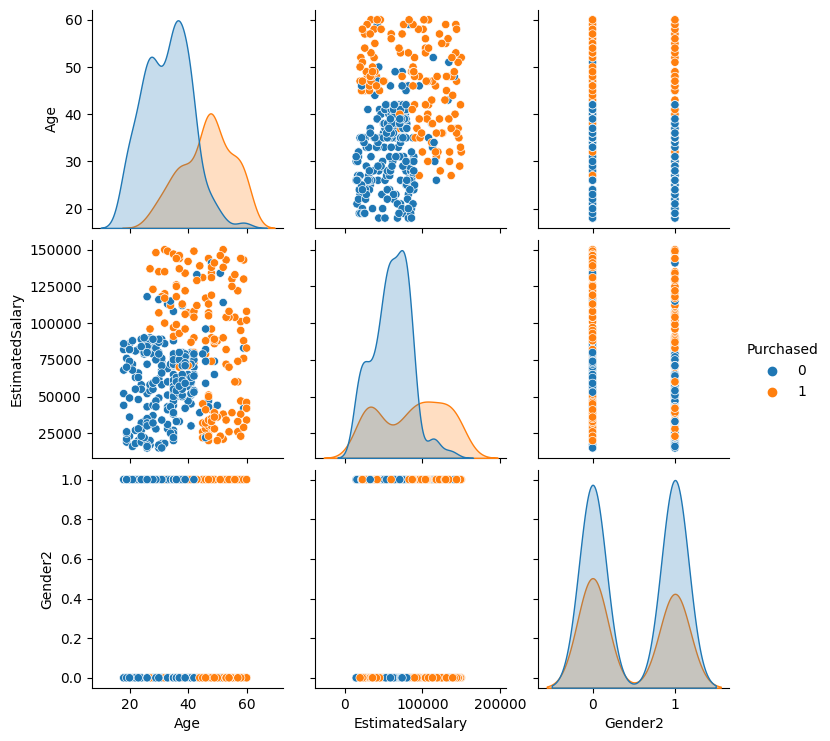

In [40]:
sns.pairplot(df, hue="Purchased")

In [41]:
print(df['Gender'].value_counts())
df.groupby('Gender')['Purchased'].sum()

Female    204
Male      196
Name: Gender, dtype: int64


Gender
Female    77
Male      66
Name: Purchased, dtype: int64

In [42]:
# Gender does not seem to have any significant impact on the purchase

df = df.drop(['Gender', 'Gender2'], axis = 1)


<h3><b>Feature Engineering</b></h3>

In [43]:
df['Elder'] = [1 if x > 40 else 0 for x in df['Age']]
df['High Earning'] = [1 if x > 100000 else 0 for x in df['EstimatedSalary']]

<h3><b>Training/Testing</b></h3>

In [44]:
y = df['Purchased']
X = df.drop('Purchased', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, shuffle = True, random_state = 1)
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), index = X_train.index, columns = X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), index = X_test.index, columns = X_test.columns)
X_test.head()

,Age,EstimatedSalary,Elder,High Earning
398,-0.106635,-1.052226,-0.716599,-0.460566
125,0.184187,-0.235125,-0.716599,-0.460566
328,-0.106635,1.428259,-0.716599,2.171241
339,0.184187,1.544988,-0.716599,2.171241
172,-1.076041,1.428259,-0.716599,2.171241


<h4><b>Logistic Regression</b></h4>

In [45]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
model.score(X_test, y_test)

0.825

<h4><b>Random Forest</b></h4>

In [50]:
from sklearn.ensemble import RandomForestClassifier

n_estimators=list(range(1,20))
params_grid={
    'n_estimators': n_estimators,
    }

rf = RandomForestClassifier()
rf_gs = GridSearchCV(rf, params_grid, cv=5)
rf_gs.fit(X_train, y_train)

rf_final = RandomForestClassifier(rf_gs.best_params_['n_estimators'], random_state=1)
rf_final.fit(X_train, y_train)
print(rf_final.score(X_test, y_test))

0.875


<h4><b>KNN</b></h4>

In [49]:
from sklearn.neighbors import KNeighborsClassifier

knn2 = KNeighborsClassifier()
param_grid = {'n_neighbors': np.arange(2, 20)}
knn_gscv = GridSearchCV(knn2, param_grid, cv=5)
knn_gscv.fit(X_train, y_train)

knn_final = KNeighborsClassifier(n_neighbors=knn_gscv.best_params_['n_neighbors'])
knn_final.fit(X_train, y_train)

print(knn_final.score(X_test, y_test))

0.85
